# 2026 Olive Oil Export Forecast

Generate 2026 predictions using trained Random Forest and Prophet models for top exporting countries.

## 1. Load Models and Data

In [6]:
import pandas as pd
import joblib
from datetime import datetime
import matplotlib.pyplot as plt
import os

print('🚀 GENERATING 2026 FORECAST')

# Load trained models
rf = joblib.load('../models/rf_model.pkl')
prophet = joblib.load('../models/prophet_model.pkl')
print('✅ Models loaded')

# Load data
df = pd.read_csv('../data/raw/tunisia_olive_oil_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

print(f'📊 Data: {len(df):,} rows')

🚀 GENERATING 2026 FORECAST
✅ Models loaded
📊 Data: 7,560 rows


## 2. Generate 2026 Forecasts (Random Forest)

Predict exports for top 5 countries using Random Forest with all required features.

In [7]:
# Top 5 countries
top5_countries = ['Italy', 'Spain', 'France', 'Germany', 'USA']
forecast_2026 = []

for month in range(1, 13):
    for country in top5_countries:
        # Calculate average values for each country
        country_data = df[df['Country'] == country]
        avg_price = country_data['USD_Price'].mean()
        avg_production = country_data['Production_Tons'].mean()
        
        # Create feature set (must match training: Year, Month, USD_Price, Production_Tons)
        X_new = pd.DataFrame({
            'Year': [2026],
            'Month': [month],
            'USD_Price': [avg_price],
            'Production_Tons': [avg_production]
        })
        
        # Predict
        pred = rf.predict(X_new)[0]
        forecast_2026.append({
            'Country': country,
            'Month': month,
            'Export_Tons': round(pred),
            'USD_Price': round(avg_price, 2)
        })

forecast_df = pd.DataFrame(forecast_2026)
print(f'✅ Generated {len(forecast_df)} predictions for 2026')

✅ Generated 60 predictions for 2026


## 3. Prophet Forecast (France)

Generate France-specific forecast using Prophet time series model.

In [8]:
# Generate 12 months ahead
future = prophet.make_future_dataframe(periods=12, freq='M')
french_forecast = prophet.predict(future)

# Extract 2026 predictions
french_2026 = french_forecast[french_forecast['ds'].dt.year == 2026][['ds', 'yhat']].copy()
french_2026['yhat'] = french_2026['yhat'].round(0)
french_2026['Country'] = 'France'
french_2026['USD_Price'] = 12.50
french_2026 = french_2026.rename(columns={'ds': 'Date', 'yhat': 'Export_Tons'})

print(f'✅ Prophet forecast: {len(french_2026)} months for France')
print(french_2026.head())

✅ Prophet forecast: 0 months for France
Empty DataFrame
Columns: [Date, Export_Tons, Country, USD_Price]
Index: []


c:\Learn Programming\MachineLearning\olive-oil-forecasting\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


## 4. Save Forecasts

Export predictions to CSV in the data/forecasts folder.

In [9]:
# Save to data/forecasts folder
os.makedirs('../data/forecasts', exist_ok=True)
forecast_df.to_csv('../data/forecasts/2026_forecast.csv', index=False)

print(f'✅ Saved: data/forecasts/2026_forecast.csv ({len(forecast_df)} predictions)')
print('\n🏆 TOP COUNTRIES (Total 2026 Export):')  
print(forecast_df.groupby('Country')['Export_Tons'].sum().round(0).astype(int).sort_values(ascending=False))

✅ Saved: data/forecasts/2026_forecast.csv (60 predictions)

🏆 TOP COUNTRIES (Total 2026 Export):
Country
Spain      365447
Italy      349263
USA        322046
Germany    294164
France     286884
Name: Export_Tons, dtype: int64


## 5. Visualize 2026 Forecasts

Generate a 4-panel dashboard showing monthly trends, country comparison, France details, and price stability.

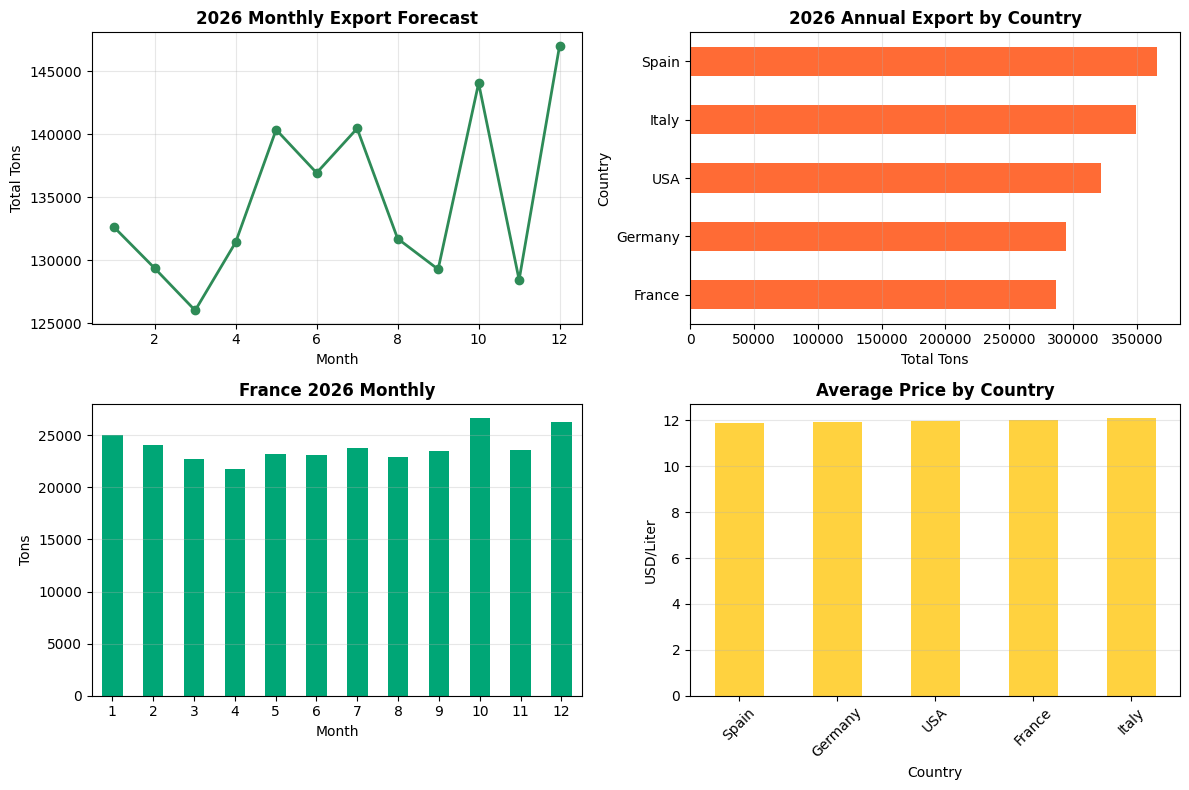


🎉 FORECAST COMPLETE!
💾 Saved: data/forecasts/2026_forecast.csv
📊 Saved: reports/2026_forecast_dashboard.png


In [10]:
plt.figure(figsize=(12, 8))

# 1) Monthly forecast
plt.subplot(2, 2, 1)
monthly_total = forecast_df.groupby('Month')['Export_Tons'].sum()
monthly_total.plot(kind='line', marker='o', color='#2E8B57', linewidth=2)
plt.title('2026 Monthly Export Forecast', fontsize=12, fontweight='bold')
plt.ylabel('Total Tons')
plt.xlabel('Month')
plt.grid(alpha=0.3)

# 2) Country comparison
plt.subplot(2, 2, 2)
country_total = forecast_df.groupby('Country')['Export_Tons'].sum().sort_values(ascending=True)
country_total.plot(kind='barh', color='#FF6B35')
plt.title('2026 Annual Export by Country', fontsize=12, fontweight='bold')
plt.xlabel('Total Tons')
plt.grid(alpha=0.3, axis='x')

# 3) France detailed
plt.subplot(2, 2, 3)
france_monthly = forecast_df[forecast_df['Country'] == 'France'].set_index('Month')['Export_Tons']
france_monthly.plot(kind='bar', color='#00A676')
plt.title('France 2026 Monthly', fontsize=12, fontweight='bold')
plt.ylabel('Tons')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.grid(alpha=0.3, axis='y')

# 4) Price distribution
plt.subplot(2, 2, 4)
prices = forecast_df.groupby('Country')['USD_Price'].first().sort_values()
prices.plot(kind='bar', color='#FFD23F')
plt.title('Average Price by Country', fontsize=12, fontweight='bold')
plt.ylabel('USD/Liter')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/2026_forecast_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print('\n🎉 FORECAST COMPLETE!')
print('💾 Saved: data/forecasts/2026_forecast.csv')
print('📊 Saved: reports/2026_forecast_dashboard.png')